In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv(r'C:\Users\M\Desktop\ironhacker\final-project\final1.csv')
df

,date,open,high,low,close,volume,total_value,weighted_price
0,2014-11-28,363.59,381.34,360.57,376.28,8617.15,3.220878e+06,373.775341
1,2014-11-29,376.42,386.60,372.25,376.72,7245.19,2.746157e+06,379.031751
2,2014-11-30,376.57,381.99,373.32,373.34,3046.33,1.145567e+06,376.048101
3,2014-12-01,376.40,382.31,373.03,378.39,6660.56,2.520662e+06,378.446012
4,2014-12-02,378.39,382.86,375.23,379.25,6832.53,2.593576e+06,379.592400
...,...,...,...,...,...,...,...,...
3620,2024-10-26,66577.77,67366.46,66343.25,67014.72,14159.11,9.464474e+08,66843.706537
3621,2024-10-27,67014.72,68254.55,66852.50,67945.14,12105.31,8.185810e+08,67621.647951
3622,2024-10-28,67945.14,70241.74,67541.00,69925.83,42091.94,2.902994e+09,68967.932842
3623,2024-10-29,69925.83,73612.24,69725.05,72723.67,58289.36,4.194343e+09,71957.271337


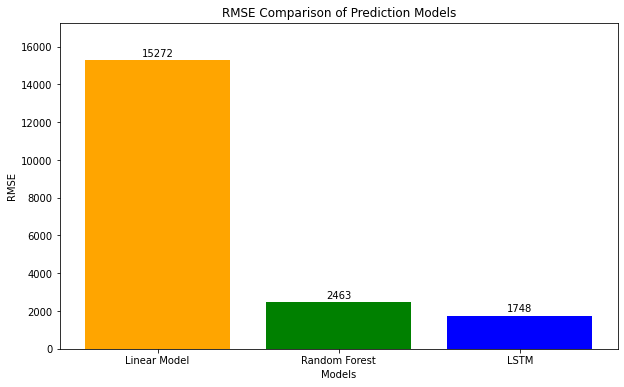

In [19]:


# Given RMSE values for each model
rmse_linear = 15272
rmse_rf = 2463
rmse_lstm = 1748

# Data for visualization
models = ['Linear Model', 'Random Forest', 'LSTM']
rmse_values = [rmse_linear, rmse_rf, rmse_lstm]

# Plotting RMSE values as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_values, color=['orange', 'green', 'blue'])
plt.title('RMSE Comparison of Prediction Models')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.ylim(0, max(rmse_values) + 2000)  # Add a bit of space above the highest bar for readability

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom')

plt.show()



Corrected Date range in df: 2014-11-28 00:00:00 to 2024-10-30 00:00:00
Average Bitcoin Price in the Last Year: 57055.47
LSTM RMSE as a Percentage of Last Year's Average Price: 3.06%
Linear Model RMSE as a Percentage of Last Year's Average Price: 26.77%
Random Forest RMSE as a Percentage of Last Year's Average Price: 4.32%


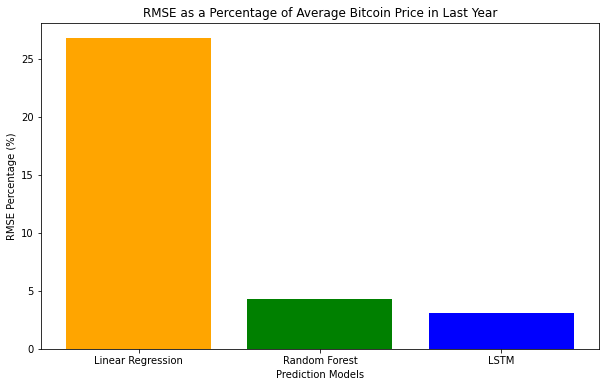

In [8]:
# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime, setting invalid parsing as NaT
df = df.dropna(subset=['date'])  # Drop any rows where 'date' couldn't be parsed
df.set_index('date', inplace=True)

# Check the date range
print("Corrected Date range in df:", df.index.min(), "to", df.index.max())

# Filter the last year's data correctly
last_date_in_df = df.index.max()
one_year_ago = last_date_in_df - pd.Timedelta(days=365)
last_year_data = df[df.index >= one_year_ago]['close']

# Calculate the average price and RMSE percentage for each model
if last_year_data.empty:
    print("No data available for the last year.")
else:
    # Average price over the last year
    average_price_last_year = last_year_data.mean()

    # Calculate RMSE percentages for each model
    rmse_lstm_percentage = (rmse_lstm / average_price_last_year) * 100
    rmse_linear_percentage = (rmse_linear / average_price_last_year) * 100
    rmse_rf_percentage = (rmse_rf / average_price_last_year) * 100

    # Display results
    print(f"Average Bitcoin Price in the Last Year: {average_price_last_year:.2f}")
    print(f"LSTM RMSE as a Percentage of Last Year's Average Price: {rmse_lstm_percentage:.2f}%")
    print(f"Linear Model RMSE as a Percentage of Last Year's Average Price: {rmse_linear_percentage:.2f}%")
    print(f"Random Forest RMSE as a Percentage of Last Year's Average Price: {rmse_rf_percentage:.2f}%")

    # Plot RMSE values as a bar chart
    rmse_values = [rmse_linear, rmse_rf, rmse_lstm]
    model_names = ['Linear Regression', 'Random Forest', 'LSTM']
    rmse_percentages = [rmse_linear_percentage, rmse_rf_percentage, rmse_lstm_percentage]

    plt.figure(figsize=(10, 6))
    plt.bar(model_names, rmse_percentages, color=['orange', 'green', 'blue'])
    plt.title("RMSE as a Percentage of Average Bitcoin Price in Last Year")
    plt.xlabel("Prediction Models")
    plt.ylabel("RMSE Percentage (%)")
    plt.show()

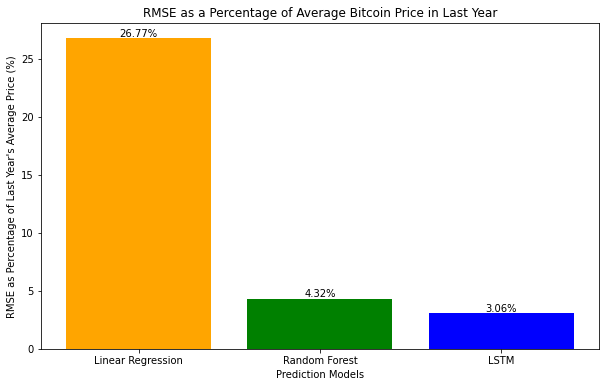

In [9]:
model_names = ['Linear Regression', 'Random Forest', 'LSTM']
rmse_percentages = [rmse_linear_percentage, rmse_rf_percentage, rmse_lstm_percentage]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_percentages, color=['orange', 'green', 'blue'])

# Add labels and title
plt.title("RMSE as a Percentage of Average Bitcoin Price in Last Year")
plt.xlabel("Prediction Models")
plt.ylabel("RMSE as Percentage of Last Year's Average Price (%)")

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()
